In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import pytse_client as tse
import tensorflow as tf
import seaborn as sns
from timeit import default_timer as timer
from keras.layers import LSTM, Dense, Dropout,Convolution1D, Activation, MaxPooling1D, Flatten,Input
from keras.models import Model, Sequential, load_model
from matplotlib.pylab import rcParams
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
from math import sqrt
import math
from tensorflow.keras import layers
from keras.callbacks import TensorBoard
from time import time
from tqdm.keras import TqdmCallback

In [3]:
Bank = pd.read_csv('tickers_data/Vebsader2.csv')
Bank.head()
display(Bank)

,date,open,high,low,adjClose,Profitability of the company,Number of Trade,count,close,p/e
0,2009-06-09,1002.0,1002.0,1001.0,1001.0,983488599500,982499500,545,1001.0,7.82
1,2009-06-10,1031.0,1031.0,1020.0,1021.0,54893697467,53760812,2406,1025.0,7.82
2,2009-06-13,1013.0,1025.0,1006.0,1023.0,123460074455,120700223,5411,1024.0,7.82
3,2009-06-14,1019.0,1026.0,1019.0,1024.0,40854431828,39890423,1995,1025.0,7.82
4,2009-06-15,1025.0,1026.0,1025.0,1025.0,35538526668,34669556,1561,1025.0,7.82
...,...,...,...,...,...,...,...,...,...,...
1798,2019-02-23,1180.0,1221.0,1175.0,1194.0,38807816067,32512172,1897,1180.0,7.13
1799,2019-02-24,1189.0,1224.0,1170.0,1195.0,46704953923,39091730,2278,1195.0,7.13
1800,2019-02-25,1207.0,1220.0,1166.0,1186.0,43181593275,36415574,2149,1166.0,7.13
1801,2019-02-26,1153.0,1172.0,1149.0,1161.0,30991481349,26685221,1545,1166.0,7.13


In [4]:
#astype date in first code
S=Bank.iloc[:, 0:1]
S1=pd.DataFrame(S)
display(S1.dtypes)
S1['date'] = S1['date'].astype('datetime64[ns]')
S1

date    object
dtype: object

,date
0,2009-06-09
1,2009-06-10
2,2009-06-13
3,2009-06-14
4,2009-06-15
...,...
1798,2019-02-23
1799,2019-02-24
1800,2019-02-25
1801,2019-02-26


In [ ]:
#first code
to_drop=['date','high','low','Profitability of the company','Number of Trade','adjClose','count','close','p/e']
Bank.drop(to_drop,inplace=True, axis=1)
Bank.head()
Bank.tail()
display(Bank)
#Normalise open data
Bank_Norm = (Bank - Bank.min())/(Bank.max() - Bank.min())
print(Bank_Norm.head(1804))
print(Bank_Norm.min())
print(Bank_Norm.max())
# join datas
joinBank=S1.join(Bank_Norm, lsuffix="_left", rsuffix="_right")
display(joinBank)
#save data
joinBank.to_csv('data/final_financialopen.csv')

In [ ]:
#second code
Bank2 = pd.read_csv('tickers_data/final_financialopen.csv')
Bank2.head()

In [ ]:
to_drop1=['date','open','low','Profitability of the company','Number of Trade','adjClose','count','close','p/e']
Bank.drop(to_drop1,inplace=True, axis=1)
Bank.head()
Bank.tail()
display(Bank)
#Normalise high
Bank_Norm = (Bank - Bank.min())/(Bank.max() - Bank.min())
print(Bank_Norm.head(1804))
print(Bank_Norm.min())
print(Bank_Norm.max())
#join data
joinBank=Bank2.join(Bank_Norm, lsuffix="_left", rsuffix="_right")
joinBank
#Drop number
to_drop1=['Unnamed: 0']
joinBank.drop(to_drop1,inplace=True, axis=1)
joinBank.head()
joinBank.tail()
display(joinBank)
#save data
joinBank.to_csv('data/final_financialhigh.csv')

In [ ]:
#third code
Bank2 = pd.read_csv('tickers_data/final_financialhigh.csv')
Bank2.head()

In [ ]:
to_drop1=['date','open', 'high', 'Profitability of the company', 'Number of Trade', 'adjClose','count','close','p/e']
Bank.drop(to_drop1,inplace=True, axis=1)
Bank.head()
Bank.tail()
display(Bank)
#Normalise high
Bank_Norm = (Bank - Bank.min())/(Bank.max() - Bank.min())
print(Bank_Norm.head(1804))
print(Bank_Norm.min())
print(Bank_Norm.max())
#join data
joinBank=Bank2.join(Bank_Norm, lsuffix="_left", rsuffix="_right")
joinBank
#Drop number
to_drop1=['Unnamed: 0']
joinBank.drop(to_drop1,inplace=True, axis=1)
joinBank.head()
joinBank.tail()
display(joinBank)
#save data
joinBank.to_csv('data/final_financiallow.csv')

In [ ]:
#forth code
Bank2 = pd.read_csv('tickers_data/final_financiallow.csv')
Bank2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Number of Trade','adjClose','count','close','p/e']
Bank.drop(to_drop1,inplace=True, axis=1)
Bank.head()
Bank.tail()
display(Bank)
#Normalise high
Bank_Norm = (Bank - Bank.min())/(Bank.max() - Bank.min())
print(Bank_Norm.head(1804))
print(Bank_Norm.min())
print(Bank_Norm.max())
#join data
joinBank=Bank2.join(Bank_Norm, lsuffix="_left", rsuffix="_right")
joinBank
#Drop number
to_drop1=['Unnamed: 0']
joinBank.drop(to_drop1,inplace=True, axis=1)
joinBank.head()
joinBank.tail()
display(joinBank)
#save data
joinBank.to_csv('data/final_financialProfitability of the company.csv')

In [ ]:
#fifth code
Bank2 = pd.read_csv('tickers_data/final_financialProfitability of the company.csv')
Bank2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','close','p/e']
Bank.drop(to_drop1,inplace=True, axis=1)
Bank.head()
Bank.tail()
display(Bank)
#Normalise high
Bank_Norm = (Bank - Bank.min())/(Bank.max() - Bank.min())
print(Bank_Norm.head(1804))
print(Bank_Norm.min())
print(Bank_Norm.max())
#join data
joinBank=Bank2.join(Bank_Norm, lsuffix="_left", rsuffix="_right")
joinBank
#Drop number
to_drop1=['Unnamed: 0']
joinBank.drop(to_drop1,inplace=True, axis=1)
joinBank.head()
joinBank.tail()
display(joinBank)
#save data
joinBank.to_csv('data/final_financialNumber of Trade.csv')

In [ ]:
#sixth code
Bank2 = pd.read_csv('tickers_data/final_financialNumber of Trade.csv')
Bank2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','Number of Trade','p/e']
Bank.drop(to_drop1,inplace=True, axis=1)
Bank.head()
Bank.tail()
display(Bank)
#Normalise high
Bank_Norm = (Bank - Bank.min())/(Bank.max() - Bank.min())
print(Bank_Norm.head(1804))
print(Bank_Norm.min())
print(Bank_Norm.max())
#join data
joinBank=Bank2.join(Bank_Norm, lsuffix="_left", rsuffix="_right")
joinBank
#Drop number
to_drop1=['Unnamed: 0']
joinBank.drop(to_drop1,inplace=True, axis=1)
joinBank.head()
joinBank.tail()
display(joinBank)
#save data
joinBank.to_csv('data/final_financialClose.csv')

In [5]:
#seventh code
Bank2 = pd.read_csv('tickers_data/final_financialClose.csv')
Bank2.head()

,Unnamed: 0,date,open,high,low,Profitability of the company,Number of Trade,close
0,0,2009-06-09,0.258098,0.248438,0.273250,0.846398,0.869169,0.252252
1,1,2009-06-10,0.273008,0.263542,0.283177,0.047242,0.047559,0.264971
2,2,2009-06-13,0.263753,0.260417,0.275862,0.106250,0.106777,0.264441
3,3,2009-06-14,0.266838,0.260937,0.282654,0.035159,0.035289,0.264971
4,4,2009-06-15,0.269923,0.260937,0.285789,0.030584,0.030670,0.264971


In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company', 'Number of Trade','adjClose','count','close']
Bank.drop(to_drop1,inplace=True, axis=1)
Bank.head()
Bank.tail()
display(Bank)
#Normalise high
Bank_Norm = (Bank - Bank.min())/(Bank.max() - Bank.min())
print(Bank_Norm.head(1804))
print(Bank_Norm.min())
print(Bank_Norm.max())
#join data
joinBank=Bank2.join(Bank_Norm, lsuffix="_left", rsuffix="_right")
joinBank
#Drop number
to_drop1=['Unnamed: 0']
joinBank.drop(to_drop1,inplace=True, axis=1)
joinBank.head()
joinBank.tail()
display(joinBank)
#save data
joinBank.to_csv('data/final_financialPE.csv')

In [4]:
# load train data in third code
Bank_train=pd.read_csv('tickers_data/Vebsader2_train.csv')
Bank_train.shape
#Bank_train.head(1442)

(1261, 9)

In [5]:
#choose train data in third code
training_set = Bank_train.iloc[:, 2:3].values

In [6]:
#normalization data in third code
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
#split x, y train in third code
X_train = []
y_train = []
for i in range(21, 1260):
    X_train.append(training_set_scaled[i-21:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
#reshape x train in third code
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
display(training_set_scaled)
training_set_scaled.max()
#training_set_scaled.min()

array([[0.17918089],
       [0.19567691],
       [0.185438  ],
       ...,
       [0.04152446],
       [0.02730375],
       [0.04095563]])

1.0

In [10]:
#read test data third
Bank_test=pd.read_csv('tickers_data/Vebsader_test.csv')
Bank_test.shape

(542, 9)

In [11]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(y_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
#model.summary()

Epoch 1/10
31/31 [==============================] - 25s 284ms/step - loss: 0.0588 - mse: 0.0588 - mae: 0.1842 - mape: 55.4804 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0536 - val_mape: 462077.3750
Epoch 2/10
31/31 [==============================] - 3s 92ms/step - loss: 0.0177 - mse: 0.0177 - mae: 0.0842 - mape: 24.6753 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0606 - val_mape: 426139.0938
Epoch 3/10
31/31 [==============================] - 3s 91ms/step - loss: 0.0180 - mse: 0.0180 - mae: 0.0876 - mape: 27.4280 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0253 - val_mape: 277733.6875
Epoch 4/10
31/31 [==============================] - 3s 89ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0846 - mape: 24.8400 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0270 - val_mape: 123601.3047
Epoch 5/10
31/31 [==============================] - 3s 89ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0764 - mape: 22.9509 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0408 - val_m

In [13]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 21s 210ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1673 - mape: 54.6559 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0590 - val_mape: 525483.0625
Epoch 2/10
31/31 [==============================] - 3s 92ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.0955 - mape: 27.2663 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0786 - val_mape: 587186.7500
Epoch 3/10
31/31 [==============================] - 3s 92ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0785 - mape: 25.4891 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0328 - val_mape: 340755.6562
Epoch 4/10
31/31 [==============================] - 3s 92ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.0852 - mape: 24.4374 - val_loss: 0.0117 - val_mse: 0.0117 - val_mae: 0.1040 - val_mape: 668486.0625
Epoch 5/10
31/31 [==============================] - 3s 92ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0841 - mape: 26.4787 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0379 - val_m

In [15]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 21s 200ms/step - loss: 0.0493 - mse: 0.0493 - mae: 0.1635 - mape: 51.3620 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0409 - val_mape: 398224.1875
Epoch 2/10
31/31 [==============================] - 3s 93ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0864 - mape: 25.8822 - val_loss: 9.9144e-04 - val_mse: 9.9144e-04 - val_mae: 0.0230 - val_mape: 214799.0625
Epoch 3/10
31/31 [==============================] - 3s 94ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0844 - mape: 24.5709 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0513 - val_mape: 386873.0000
Epoch 4/10
31/31 [==============================] - 3s 93ms/step - loss: 0.0193 - mse: 0.0193 - mae: 0.0901 - mape: 26.6101 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0317 - val_mape: 181928.2344
Epoch 5/10
31/31 [==============================] - 3s 93ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0771 - mape: 24.0174 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0266

In [21]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 21s 231ms/step - loss: 0.0587 - mse: 0.0587 - mae: 0.1883 - mape: 58.7266 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0975 - val_mape: 743940.6250
Epoch 2/10
31/31 [==============================] - 3s 105ms/step - loss: 0.0195 - mse: 0.0195 - mae: 0.0999 - mape: 30.0305 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0606 - val_mape: 508094.7500
Epoch 3/10
31/31 [==============================] - 3s 104ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0821 - mape: 24.9689 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0549 - val_mape: 418776.8438
Epoch 4/10
31/31 [==============================] - 3s 104ms/step - loss: 0.0148 - mse: 0.0148 - mae: 0.0827 - mape: 25.7870 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0300 - val_mape: 307066.7188
Epoch 5/10
31/31 [==============================] - 3s 104ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0817 - mape: 24.4472 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0350 - v

In [19]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 25s 256ms/step - loss: 0.0517 - mse: 0.0517 - mae: 0.1775 - mape: 56.3637 - val_loss: 0.0092 - val_mse: 0.0092 - val_mae: 0.0867 - val_mape: 684618.5000
Epoch 2/10
31/31 [==============================] - 3s 109ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.0977 - mape: 28.6288 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0345 - val_mape: 363472.4062
Epoch 3/10
31/31 [==============================] - 3s 109ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0865 - mape: 25.6034 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0396 - val_mape: 406227.0000
Epoch 4/10
31/31 [==============================] - 3s 109ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0828 - mape: 24.4484 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0330 - val_mape: 318187.9375
Epoch 5/10
31/31 [==============================] - 3s 109ms/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0752 - mape: 22.9668 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0495 - v

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 20
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

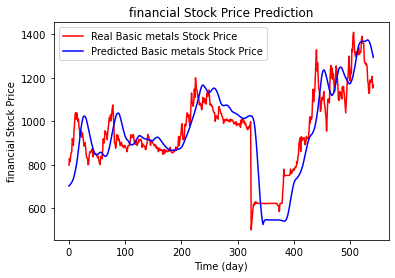

In [22]:
#third code
y_test=[]
real_stock_price = Bank_test.iloc[:, 1:2].values
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc1.fit_transform(real_stock_price)

# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((Bank_train['close'], Bank_test['close']), axis = 0)
# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(Bank_test) - 21:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

for i in range(21, 563 ):
    X_test.append(inputs[i-21:i, 0])
    y_test.append(inputs[i, 0])

X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = model.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Basic metals Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Basic metals Stock Price')
plt.title('financial Stock Price Prediction')
plt.xlabel('Time (day)')
plt.ylabel('financial Stock Price')
plt.legend()
plt.show()